# Project description

Context
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.

You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

Description of the data
Data used in the first part of the project
/datasets/hypotheses_us.csv Download dataset

* ```Hypotheses``` — brief descriptions of the hypotheses
* ```Reach``` — user reach, on a scale of one to ten
* ```Impact``` — impact on users, on a scale of one to ten
* ```Confidence``` — confidence in the hypothesis, on a scale of one to ten
* ```Effort``` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Data used in the second part of the project
/datasets/orders_us.csv Download dataset

* ```transactionId``` — order identifier
* ```visitorId``` — identifier of the user who placed the order
* ```date``` — of the order
* ```revenue``` — from the order
* ```group``` — the A/B test group that the user belongs to

/datasets/visits_us.csv Download dataset

* ```date``` — date
* ```group``` — A/B test group
* ```visits``` — the number of visits on the date specified in the A/B test group specified

Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.




# Download and Prepare Data
We are going to do the following:
* Store the data on hypotheses, orders and visits in variables. 
* Optimize the data for analysis. 
* Make sure each column contains the correct data type.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
pd.reset_option('^display.', silent=True)

In [2]:
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep = ';')

In [3]:
orders = pd.read_csv('datasets/orders_us.csv')

In [4]:
visits = pd.read_csv('datasets/visits_us.csv')

In [5]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
print(hypotheses)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [7]:
# we got truncated cell contents, so we're going to change the display setting
pd.set_option('display.max_colwidth', None)


# pd.options.display.max_rows = 75

In [8]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [9]:
hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [10]:
# we will also switch to lowercase, as well as change the numbers from string to int type
hypotheses.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
hypotheses['reach'] = hypotheses['reach'].astype('int')
hypotheses['impact'] = hypotheses['impact'].astype('int')
hypotheses['confidence'] = hypotheses['confidence'].astype('int')
hypotheses['effort'] = hypotheses['effort'].astype('int')

In [11]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
# we're going to change date from string to datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [15]:
# change group from string to category type
# orders['group'] = orders['group'].astype('category')
# if we change group type to category as per the dataset optimization advice from earlier in the course,
# this causes an error later when apply a lambda function -- don't know how to fix

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# change date from string to datetime type
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

In [20]:
# change group from string to category type
# visits['group'] = visits['group'].astype('category')

In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Project description advice:
We were informed that some users erroneously belonged to both groups, so let's take a look:

In [22]:
group_a = orders[orders['group'] == 'A']
group_b = orders[orders['group'] == 'B']

In [23]:
len(group_a.visitorId.unique())

503

In [24]:
len(group_b.visitorId.unique())

586

In [25]:
a_and_b = group_a.merge(group_b, on='visitorId', how ='inner')

In [26]:
len(a_and_b.visitorId)

183

So 183 orders were placed by users belonging to both groups

In [27]:
users_in_both_groups = a_and_b.drop_duplicates(subset = ['visitorId'])

In [28]:
users_in_both_groups.shape

(58, 9)

So, a total of 58 users belongs to both groups.

In [29]:
a_b_grouped = a_and_b.groupby('visitorId').agg({'revenue_x':'sum',
                                 'revenue_y':'sum'}).reset_index()

In [30]:
a_b_grouped

,visitorId,revenue_x,revenue_y
0,8300375,30.5,165.7
1,199603092,311.9,222.8
2,232979603,5.9,45.6
3,237748145,62.0,480.8
4,276558944,80.7,190.0
5,351125977,70.0,235.6
6,393266494,671.0,526.1
7,457167155,77.7,136.7
8,471551937,355.1,55.2
9,477780734,115.3,60.2


In [31]:
orders[orders['visitorId'] == 4256040402].sort_values(by='date')

,transactionId,visitorId,date,revenue,group
114,1120327437,4256040402,2019-08-01,90.2,A
873,2519737434,4256040402,2019-08-08,900.7,B
1091,750632879,4256040402,2019-08-12,5.8,A
60,1421016313,4256040402,2019-08-16,875.5,B
187,2048878902,4256040402,2019-08-17,25.8,A
263,2575861846,4256040402,2019-08-18,170.8,B
588,3700356838,4256040402,2019-08-20,275.5,A
253,1610091760,4256040402,2019-08-23,265.8,A
901,3402467119,4256040402,2019-08-27,30.1,A
1018,1415970216,4256040402,2019-08-31,80.5,A


In [32]:
orders[orders['visitorId'] == 2378935119].sort_values(by='date')

,transactionId,visitorId,date,revenue,group
697,1612868255,2378935119,2019-08-09,475.5,B
1029,469609643,2378935119,2019-08-10,900.7,A
1031,1661772358,2378935119,2019-08-10,45.6,B
33,486237576,2378935119,2019-08-15,30.4,A
179,1784270968,2378935119,2019-08-17,5.8,A
118,4233533907,2378935119,2019-08-22,55.2,A
391,2213813903,2378935119,2019-08-25,330.5,B
435,2430683444,2378935119,2019-08-28,315.6,B
473,3224706027,2378935119,2019-08-28,70.8,B


In [33]:
orders[orders['visitorId'] == 2458001652].sort_values(by='date')

,transactionId,visitorId,date,revenue,group
611,1244084011,2458001652,2019-08-04,10.2,A
883,2412219836,2458001652,2019-08-05,40.2,B
454,3755354294,2458001652,2019-08-06,115.1,B
456,543654048,2458001652,2019-08-06,25.9,A
483,2280027650,2458001652,2019-08-06,105.8,B
727,3959083601,2458001652,2019-08-07,270.4,A
916,527333943,2458001652,2019-08-08,85.4,B
692,3586870909,2458001652,2019-08-09,85.4,B
1062,1817215137,2458001652,2019-08-11,130.4,A
133,3060563671,2458001652,2019-08-22,80.8,A


### Observation on multi-grouped users
A sample of several users do not indicate any logical reasoning for switching groups -- such as, in the beginning, the user was erroneously put in group A, and then later correctly placed in group B.  It appears a number of users have switched groups throughout the month.

That doesn't make any sense, and indicates that a discussion with the data engineers and product owner should take place to see if something is happening in the flow of the user's ordering process that seems to arbitrarily put them in a group, or if there's some other problem.

#### For the purpose of continuing analysis, we will drop these 58 users from the dataset.

In [34]:
orders_df = pd.merge(orders,users_in_both_groups, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [35]:
orders_df.shape

(1016, 13)

In [36]:
group_a_df = orders_df[orders_df['group'] == 'A']
group_b_df = orders_df[orders_df['group'] == 'B']

In [37]:
group_a_df.shape

(468, 13)

In [38]:
group_b_df.shape

(548, 13)

In [39]:
group_a_df = orders_df[orders_df['group'] == 'A']
group_b_df = orders_df[orders_df['group'] == 'B']

In [40]:
group_a_df.shape

(468, 13)

In [41]:
group_b_df.shape

(548, 13)

# Part 1. Prioritizing Hypotheses

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

The task is to:
* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [42]:
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
hypotheses[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [43]:
hypotheses['RICE'] = hypotheses['reach']* hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
hypotheses[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In [44]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


## ICE vs RICE
The top ICE hypothesis is launching a promotion that gives users discounts on their birthdays.  This makes sense everyone has a birthday, and getting a (big?) discount is like getting a birthday present.  And who doesn't like presents?  So, here the impact is assured.  However, in the RICE framework, this idea falls to 5.  Why?  Most likely because of "R" - ```reach``` First, a birthday comes only once a year, and so this discount is rare as opposed to all the holiday sales that happen in a year.  Second, what about all the folks whose birthday is on a different day?  Are you supposed to buy things on sale for other folks only on YOUR birthday, for instance?  So, the reach of this idea, being the worst of the bunch, affected the RICE scoring.

The two ideas that rank in the top three in both frameworks are:

* adding the subscription form to all the main pages in order to get a mailing list
* add two new channels to draw in 30% more users

That they're highly ranked in both frameworks means they're probably the best ones to implement, so I would give these two the top priority.

If time is of the essence, or if there's a junior developer with nothing to do, then we can have him/her implement the easier to do items such as:
* changing background colors
* adding customer review page
* show banner promotions

In the end, reach seems like a very important factor to consider.

# Part 2. A/B Test Analysis

We carried out the A/B test and got the results described in the files orders_us.csv and visits_us.csv.

## Task

We will analyze the A/B test:
* Graph cumulative revenue by group. Make conclusions and conjectures.
* Graph cumulative average order size by group. Make conclusions and conjectures.
* Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
* Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
* Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
* Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
* Plot a scatter chart of order prices. Make conclusions and conjectures.
* Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
* Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
* Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
* Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
* Find the statistical significance of the difference in average order size between the groups using the filtered data. *Make conclusions and conjectures.
* Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

### Cumulative Revenue by Group

In [45]:
dates_groups = orders_df[['date', 'group']].drop_duplicates()

In [46]:
orders_aggregated = dates_groups.apply(lambda x:
                                     orders[np.logical_and(orders['date'] <= x['date'],
                                                          orders['group'] == x['group'])].agg({
                                         'date' : 'max',
                                         'group' : 'max',
                                         'transactionId' : 'nunique',
                                         'visitorId' : 'nunique',
                                         'revenue' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])
                    
    
visits_aggregated = dates_groups.apply(lambda x:
                                        visits[np.logical_and(visits['date'] <= x['date'],
                                                             visits['group'] == x['group'])].agg(
                                        {'date' : 'max',
                                        'group' : 'max',
                                        'visits' : 'sum'}), axis = 1).sort_values(by =
                                                                                 ['date', 'group'])


cumulative_data = orders_aggregated.merge(visits_aggregated,
                                         left_on = ['date', 'group'],
                                         right_on = ['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [47]:
cumulative_revenue_group_a= cumulative_data[cumulative_data['group'] == 'A'][['date',
                                                                              'revenue',
                                                                              'orders']]

cumulative_revenue_group_b = cumulative_data[cumulative_data['group'] == 'B'][['date',
                                                                              'revenue',
                                                                              'orders']]

In [48]:
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


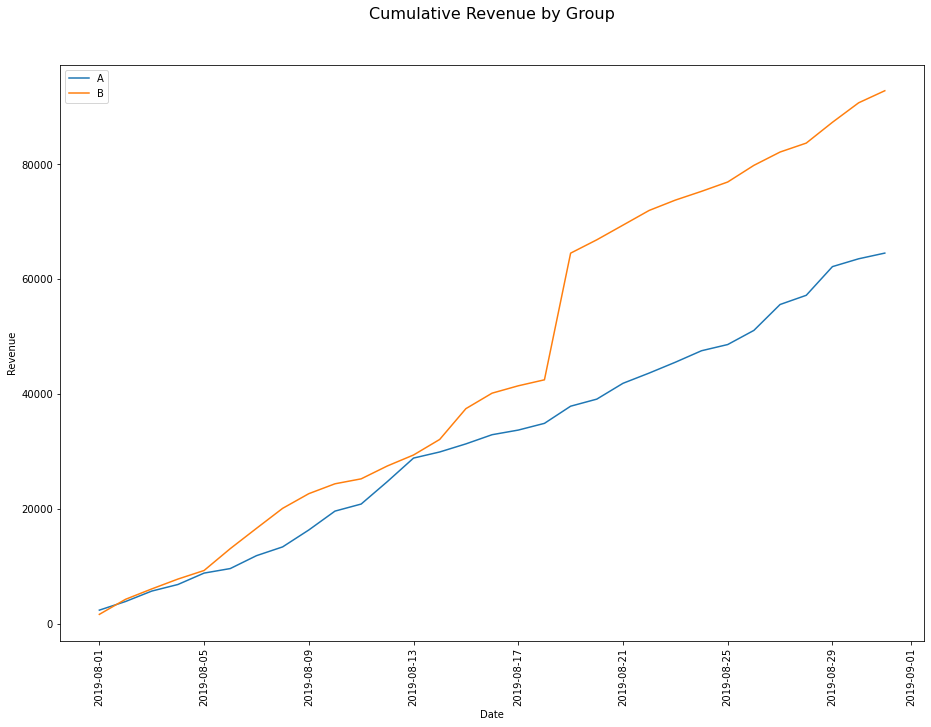

In [49]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Cumulative Revenue by Group', fontsize=16)

x_a = cumulative_revenue_group_a['date']
y_a = cumulative_revenue_group_a['revenue']

x_b = cumulative_revenue_group_b['date']
y_b = cumulative_revenue_group_b['revenue']

axes.plot(x_a, y_a, label = 'A')
axes.plot(x_b, y_b, label = 'B')

axes.set_xlabel('Date')
axes.set_ylabel('Revenue')

plt.xticks(rotation=90)
plt.legend()
plt.show()

### Observation:
It would appear that about three weeks into the testing, the B group made more/larger purchases.  So, we're off to a good start.  Let's continue our analysis.

### Cumulative Average Order Size by Group

In [50]:
cumulative_order_sizes_group_a = cumulative_revenue_group_a['revenue']/cumulative_revenue_group_a['orders']
cumulative_order_sizes_group_b = cumulative_revenue_group_b['revenue']/cumulative_revenue_group_b['orders']

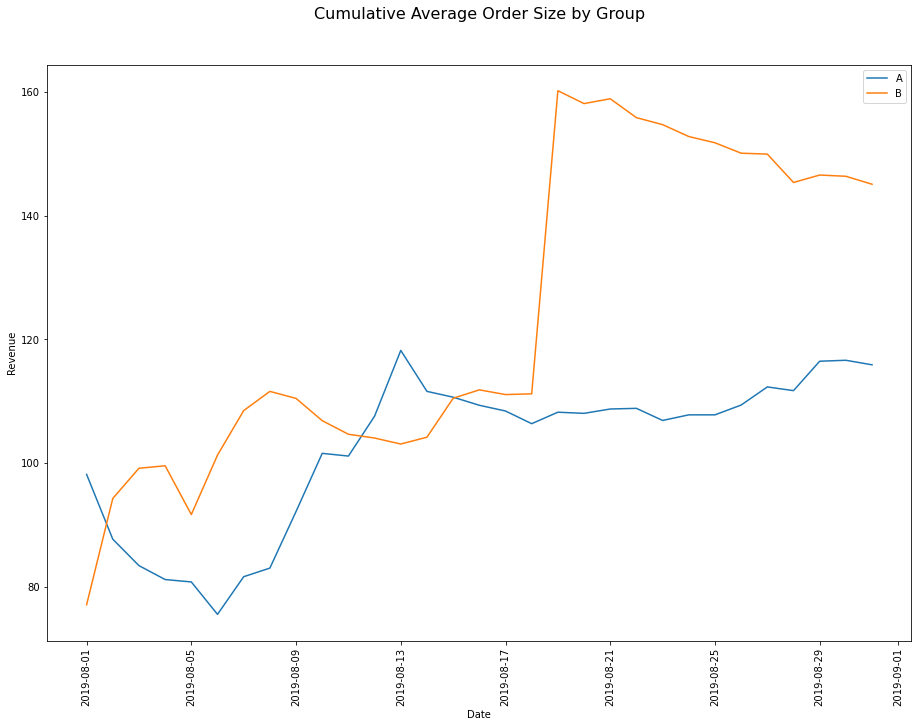

In [51]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Cumulative Average Order Size by Group', fontsize=16)

x_a = cumulative_revenue_group_a['date']
y_a = cumulative_order_sizes_group_a

x_b = cumulative_revenue_group_b['date']
y_b = cumulative_order_sizes_group_b

axes.plot(x_a, y_a, label = 'A')
axes.plot(x_b, y_b, label = 'B')

axes.set_xlabel('Date')
axes.set_ylabel('Revenue')

plt.xticks(rotation=90)
plt.legend()
plt.show()

### Observation
Cumulative orders spiked for group B at that exact same point, around the 8/18 or 8/19 mark.  So, whatever we were experimenting with appears to take a little over two weeks to see fruit.

### Relative difference in cumulative average order size

In [52]:
merged_cumulative_revenue = cumulative_revenue_group_a.merge(cumulative_revenue_group_b,
                                                            left_on = 'date',
                                                            right_on = 'date',
                                                            how = 'left',
                                                            suffixes = ['A','B'])

In [53]:
merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


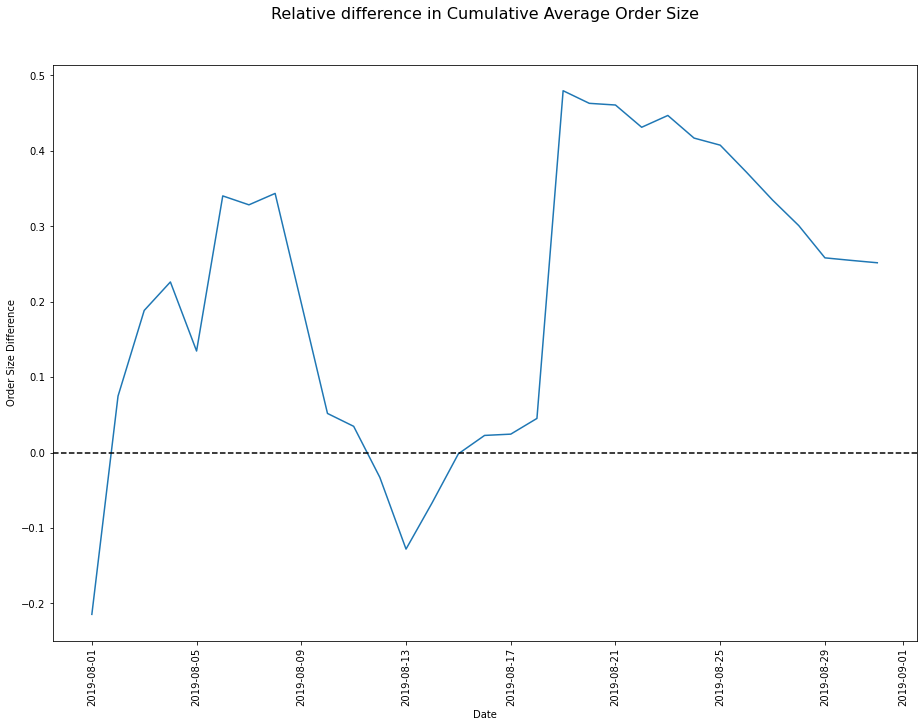

In [54]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Relative difference in Cumulative Average Order Size', fontsize=16)

x = merged_cumulative_revenue['date']
y = ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']) -1)

axes.plot(x, y)

axes.set_xlabel('Date')
axes.set_ylabel('Order Size Difference')

plt.axhline(y=0, color = 'black', linestyle = '--')
plt.xticks(rotation=90)

plt.show()

### Observation
The relative difference actually shows that the B group performed better almost right from the start.  There is a dip right at 8/3 -- 12 days in.

### Daily conversion rates of the two groups

In [55]:
min_date = min(orders['date'])
max_date = max(orders['date'])

In [56]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_group_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_group_b = cumulative_data[cumulative_data['group'] == 'B']

In [57]:
max(cumulative_data.conversion)

0.03685636856368564

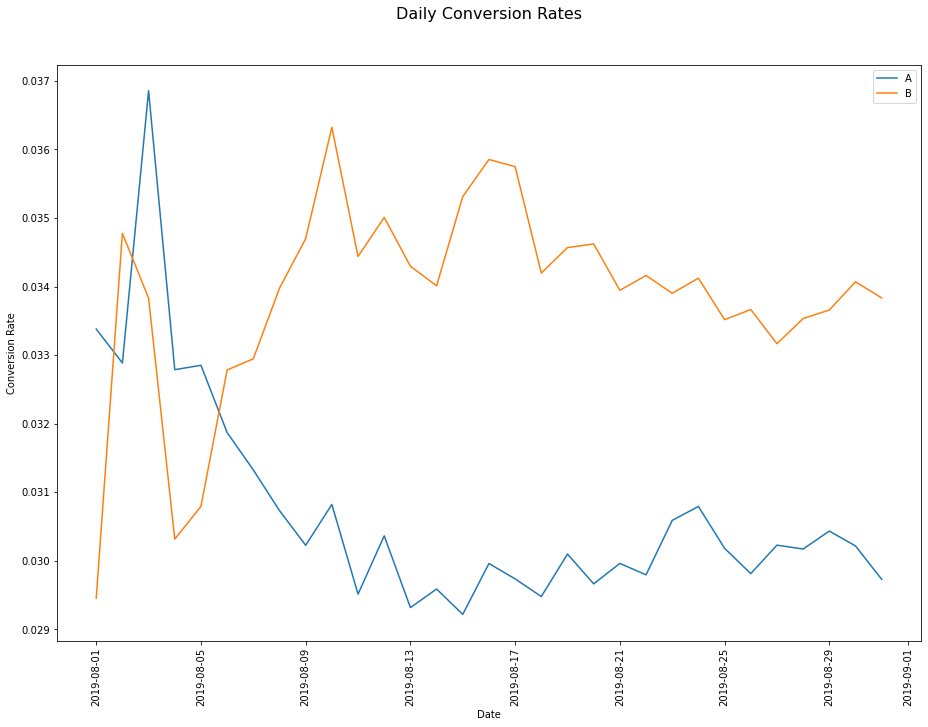

In [58]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Daily Conversion Rates', fontsize=16)

x_a = cumulative_data_group_a['date']
y_a = cumulative_data_group_a['conversion']

x_b = cumulative_data_group_b['date']
y_b = cumulative_data_group_b['conversion']

axes.plot(x_a, y_a, label = 'A')
axes.plot(x_b, y_b, label = 'B')

axes.set_xlabel('Date')
axes.set_ylabel('Conversion Rate')

#plt.axis(['2019-08-01', '2019-08-31', 0, 0.04])
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [59]:
merged_cumulative_conversions = cumulative_data_group_a[['date','conversion']].merge(cumulative_data_group_b[['date','conversion']],
                                                                                    left_on = 'date',
                                                                                    right_on = 'date',
                                                                                    how = 'left',
                                                                                    suffixes = ['A','B'])

### Observation
We can see that group B conversion is consistently better after say the first week.  What happened during that first weeek -- the chart doesn't really help, so let's see the relative difference between group B and A.

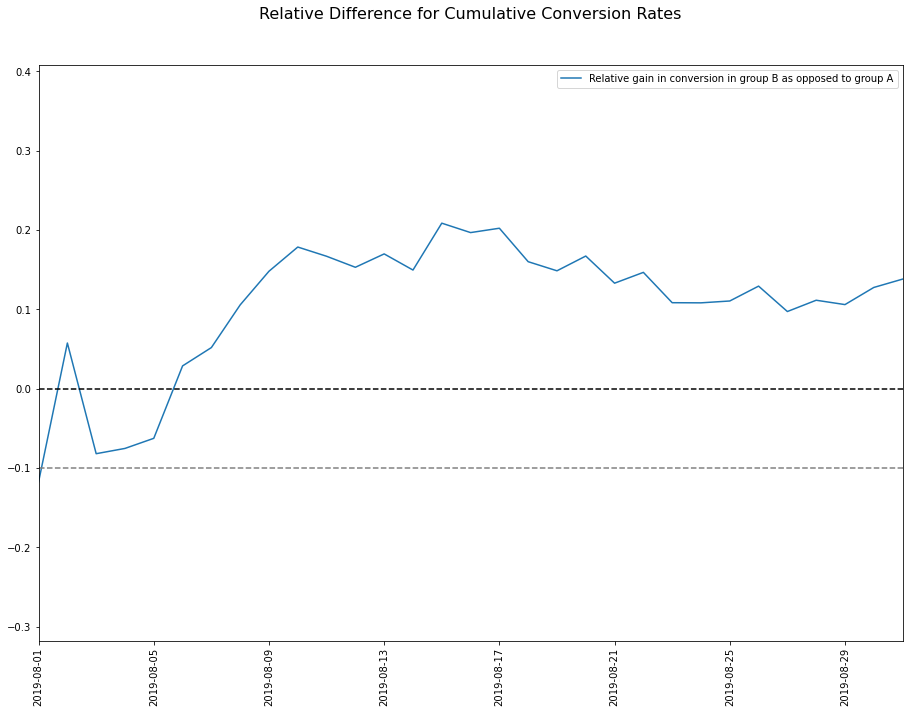

In [60]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Relative Difference for Cumulative Conversion Rates', fontsize=16)

x = merged_cumulative_conversions['date']
y = merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1

axes.plot(x, y, label = 'Relative gain in conversion in group B as opposed to group A')


plt.axis([min(x), max(x), min(y) - .2, max(y) + .2])
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = -0.1, color = 'grey', linestyle = '--')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Observation
We can see that things fluctuated between the two groups, but the conversion rate stabilized after the first week, and appears pretty consistently better for group B after week 2.

### Plot a scatter chart of the number of orders per user

In [61]:
orders_grouped_by_user = orders_df.groupby('visitorId').agg({'revenue' : 'count'}).reset_index()

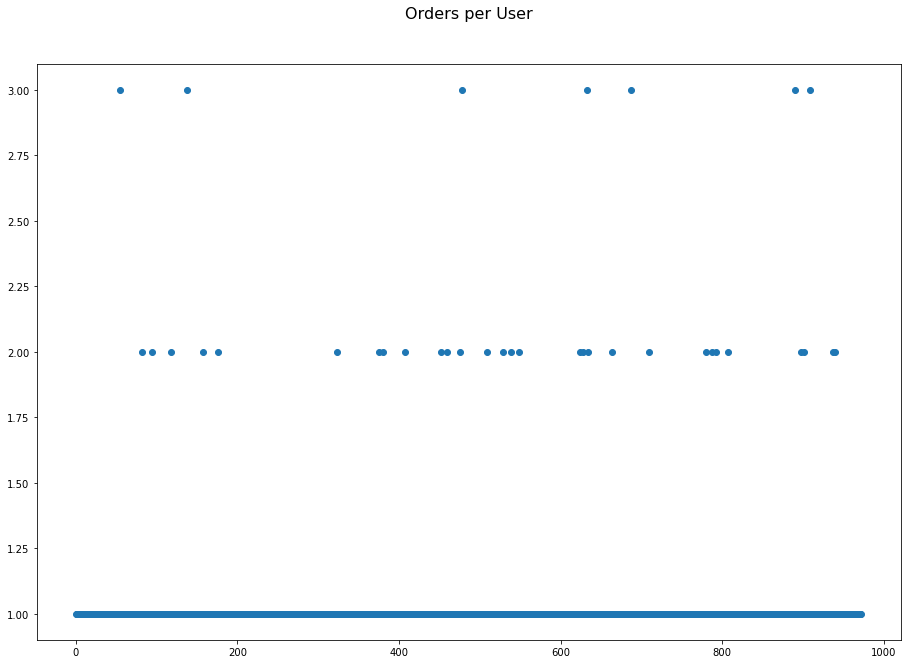

In [62]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Orders per User', fontsize=16)


x = pd.Series(range(0, len(orders_grouped_by_user['visitorId'])))
y = orders_grouped_by_user['revenue']

plt.scatter(x, y)


#plt.axis(['2019-08-01', '2019-08-31', 0, 0.04])
#plt.xticks(rotation=90)
#plt.legend()
plt.show()

### Observation
It appears most customers place only one order.  Most repeat customers place two orders.  Only 7 customers placed more than two.  So, emphasis should be made on getting repeat purchases.  Questions to ask:
1. Are the customers satisfied with the product?  (What kind of product/service is being sold?  Is it logical for customers to make repeat purchases of it, or is that the exception?)
2. Are there anything special about the outliers?  3 is not overly "too much", unless we're talking a car or a house (NOTE: if we kept the users who belonged to both group A and B, we wind up with 4-5 users who order up to 10 times or so)

### The 95th and 99th percentiles for the number of orders per user

In [63]:
print(np.percentile(orders_grouped_by_user['revenue'], [95, 99]))

[1. 2.]


### Observation
Not more than 1% of orders have more than 2 orders.  So any user ordering more than 2 can be considered an anomaly.

### Scatter plot of revenue per order

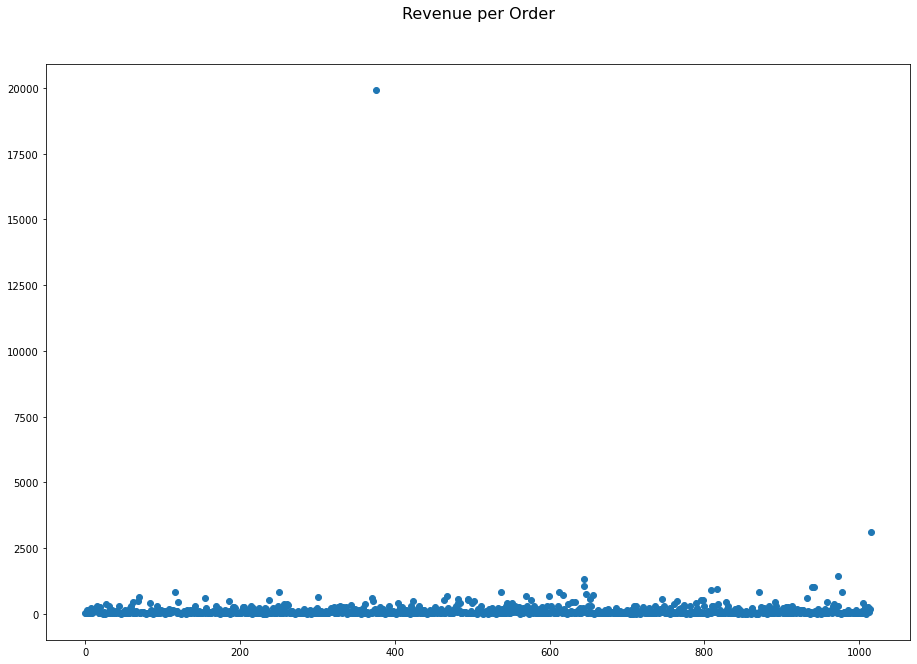

In [64]:
fig = plt.figure(figsize = (15, 10))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Revenue per Order', fontsize=16)


x = pd.Series(range(0, len(orders_df['revenue'])))
y = orders_df['revenue']

plt.scatter(x, y)


#plt.axis(['2019-08-01', '2019-08-31', 0, 0.04])
#plt.xticks(rotation=90)
#plt.legend()
plt.show()

### Observation
There appears to be one user from whom $20000 in revenue was taken in.  That one extreme outlier:
1. Throws off the analysis
2. But also warrants special attention.  This could be a VIP customer.  Perhaps a dedicated salesperson should be tasked to establish a deeper relationship, as this could possibly become a high paying regular customer

Also, another user appears to have placed orders worth $2500.

### The 95th and 99th percentiles for orders

In [65]:
print(np.percentile(orders_df['revenue'], [95, 99]))

[414.275 830.3  ]


Not more than 1% of orders total more than $830.  

So any orders totaling more than $830 can be considered an anomaly.

## Remove outlier
We will remove orders whose revenues are greater than $830.3

In [66]:
orders_df[orders_df['revenue'] > 830.3]

,transactionId,visitorId,date,revenue,group,transactionId_x,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
506,590470918,1920142716,2019-08-19,19920.4,B,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
802,3603576309,4133034833,2019-08-09,1050.0,A,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
803,3668308183,888512513,2019-08-27,1335.6,B,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
981,2420050534,4003628586,2019-08-08,905.8,B,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
989,1347999392,887908475,2019-08-21,930.0,A,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1114,316924019,148427295,2019-08-12,1015.9,A,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1116,1348774318,1164614297,2019-08-12,1025.8,A,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1150,666610489,1307669133,2019-08-13,1425.8,A,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN
1196,3936777065,2108080724,2019-08-15,3120.1,B,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN


In [67]:
orders_df.drop(orders_df[orders_df['revenue'] > 830.3].index, inplace = True)

In [68]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1195
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactionId    1007 non-null   int64         
 1   visitorId        1007 non-null   int64         
 2   date             1007 non-null   datetime64[ns]
 3   revenue          1007 non-null   float64       
 4   group            1007 non-null   object        
 5   transactionId_x  0 non-null      float64       
 6   date_x           0 non-null      datetime64[ns]
 7   revenue_x        0 non-null      float64       
 8   group_x          0 non-null      object        
 9   transactionId_y  0 non-null      float64       
 10  date_y           0 non-null      datetime64[ns]
 11  revenue_y        0 non-null      float64       
 12  group_y          0 non-null      object        
dtypes: datetime64[ns](3), float64(5), int64(2), object(3)
memory usage: 110.1+ KB


### Statistical significance of the difference in conversion between the groups using the raw data

In [69]:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId',
                                                          as_index = False).agg({'transactionId':'nunique'})

orders_by_users_a.columns = ['userId', 'orders']

In [70]:
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId',
                                                          as_index = False).agg({'transactionId':'nunique'})

orders_by_users_b.columns = ['userId', 'orders']

In [71]:
sample_a = pd.concat([orders_by_users_a['orders'], 
                      pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(
    orders_by_users_a['orders'])),
    name = 'orders')],
    axis = 0)

In [72]:
sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(
    orders_by_users_b['orders'])),
    name = 'orders')],
    axis = 0)

In [73]:
print("The p-value is: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("The relative difference of group B from group A is: {0:.3f}".format(sample_b.mean() / sample_a.mean() -1))

The p-value is: 0.008
The relative difference of group B from group A is: 0.138


### Observation
Based on the raw data, there is a difference between groups A and B.
The p-value of .008 is less than 0.5, so we reject the null hypothesis that there's no significant difference in conversion between the groups.

The relative gain of group B is 13.8%

### Statistical significance of the difference in average order size between the groups using the raw data

In [74]:
print("The p-value is: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                                  orders[orders['group'] == 'B']['revenue'])[1]))

print("The relative difference in order size of group B from group A is: {0:.3f}".format(
orders[orders['group'] == 'B']['revenue'].mean() /
orders[orders['group'] == 'A']['revenue'].mean() -1 ))

The p-value is: 0.346
The relative difference in order size of group B from group A is: 0.252


### Observation
The p-value is greater that 0.05, so there's no reason the reject the null hypothesis and conclude that the average order size differs between the groups.  Nonetheless, the average order size for group B is still bigger than it is for group A -- over 25%, in fact!

### Statistical significance of the difference in conversion between the groups using the filtered data.

In [75]:
orders_by_users_a_filtered = orders_df[orders_df['group'] == 'A'].groupby('visitorId',
                                                          as_index = False).agg({'transactionId':'nunique'})

orders_by_users_a_filtered.columns = ['userId', 'orders']

In [76]:
orders_by_users_b_filtered = orders_df[orders_df['group'] == 'B'].groupby('visitorId',
                                                          as_index = False).agg({'transactionId':'nunique'})

orders_by_users_b_filtered.columns = ['userId', 'orders']

In [77]:
sample_a_filtered = pd.concat([orders_by_users_a_filtered['orders'], 
                      pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(
    orders_by_users_a_filtered['orders'])),
    name = 'orders')],
    axis = 0)

In [78]:
sample_b_filtered = pd.concat([orders_by_users_b_filtered['orders'], 
                      pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(
    orders_by_users_b_filtered['orders'])),
    name = 'orders')],
    axis = 0)

In [79]:
print("The p-value is: {0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_a_filtered)[1]))
print("The relative difference of group B from group A is: {0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() -1))

The p-value is: 0.500
The relative difference of group B from group A is: 0.164


### Observation
Based on the filtered data, there is still a difference between groups A and B.
The p-value is greater than 0.05 so we cannot reject the null hypothesis that there's no significant difference in conversion between the groups.

The relative gain of group B is 16.4%

### Statistical significance of the difference in average order size between the groups using the filtered data. 

In [80]:
print("The p-value is: {0:.3f}".format(stats.mannwhitneyu(orders_df[orders_df['group'] == 'A']['revenue'],
                                                  orders_df[orders_df['group'] == 'B']['revenue'])[1]))

print("The relative difference in order size of group B from group A is: {0:.3f}".format(
orders_df[orders_df['group'] == 'B']['revenue'].mean() /
orders_df[orders_df['group'] == 'A']['revenue'].mean() -1 ))

The p-value is: 0.467
The relative difference in order size of group B from group A is: -0.031


### Observation
The p-value is greater that 0.05, so there's no reason the reject the null hypothesis and conclude that the average order size differs between the groups.  The average order size for group B is 3.1% less!

Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

## Conclusion:
Based on the graphical comparisons, as well as the statistical analysis, I would consider continuing the test.  While the conversion rate seems to be greater in group B, we should get to perhaps a thousand users in both groups in order for a more fair comparison.  We found out that dropping the outliers in groub B affected the average negatively, when other metrics suggest that Group B should be superior.

We already started with an unequal dataset, so continuing until we hit an even thousand for both groups should be reasonable.  At this rate, another month should do.